# Time to revert for enwiki ns0, by bot type

## Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob
import pickle
%matplotlib inline

## Load comment classified dataset

In [55]:
with open("../comments/df_all_comments_parsed.pickle", "rb") as f:
    df_all = pickle.load(f)

In [3]:
len(df_all)

1843935

In [4]:
df_all[0:2].transpose()

reverting_timestamp_dt,2009-02-28 02:19:25,2009-02-10 23:03:37
archived,False,False
language,en,en
page_namespace,0,1
rev_deleted,False,False
rev_id,273691771,136526894
rev_minor_edit,False,False
rev_page,5040439,3046554
rev_parent_id,2.59117e+08,1.20932e+08
rev_revert_offset,1,1
rev_sha1,qj45ne2z4yfexmpaz5wfnbm2yrmqt4j,3xtnw7u4w9h6cg1smw97mqnr1en6a55


In [5]:
df_all.replace("interwiki link cleanup -- suspected", "interwiki link cleanup", inplace=True)

In [6]:
df_all.bottype.value_counts()

interwiki link cleanup                             1187158
fixing double redirect                              285406
AIV helperbot                                       148172
other                                                71533
has per justification                                41190
template cleanup                                     35786
archiving                                            31826
clearing sandbox                                     10468
other w/ revert in comment                           10112
moving category                                       8264
protection template cleanup                           6084
category redirect cleanup                             4186
mathbot mathlist updates                              1034
botfight: reverting CommonsDelinker                    732
botfight: Cyberbot II vs AnomieBOT date tagging        602
redirect tagging/sorting                               594
botfight: 718bot vs ImageRemovalBot                    3

In [7]:
df_all['time_to_revert_days_log10'] = df_all['time_to_revert_days'].apply(np.log10)
df_all['time_to_revert_hrs_log10'] = df_all['time_to_revert_hrs'].apply(np.log10)

In [8]:
df_all['time_to_revert_days_log10'].describe()

count    1.843929e+06
mean     1.274776e+00
std      1.647900e+00
min     -4.936514e+00
25%      5.211653e-01
50%      1.789998e+00
75%      2.509835e+00
max      3.683402e+00
Name: time_to_revert_days_log10, dtype: float64

In [9]:
df_en_ns0 = df_all.query("language == 'en' and page_namespace == 0").copy()

In [10]:
df_en_ns0.bottype.value_counts()

interwiki link cleanup                             242440
fixing double redirect                             220172
protection template cleanup                          5674
moving category                                      4672
other                                                4530
category redirect cleanup                            2824
template cleanup                                     2318
other w/ revert in comment                           2014
mathbot mathlist updates                             1028
has per justification                                 716
botfight: Cyberbot II vs AnomieBOT date tagging       602
redirect tagging/sorting                              594
botfight: reverting CommonsDelinker                   460
botfight: 718bot vs ImageRemovalBot                   340
botfight: infoboxneeded                               196
link syntax fixing                                    160
template tagging                                       48
commons image 

## General TTR
### Descriptive stats for all languages, articles only

In [40]:
df_all.query("page_namespace == 0")['time_to_revert_days'].describe()

count    1.122392e+06
mean     2.367609e+02
std      4.093615e+02
min     -7.921659e+02
25%      6.110576e+00
50%      6.192290e+01
75%      2.894574e+02
max      4.823938e+03
Name: time_to_revert_days, dtype: float64

### KDE for enwiki ns0

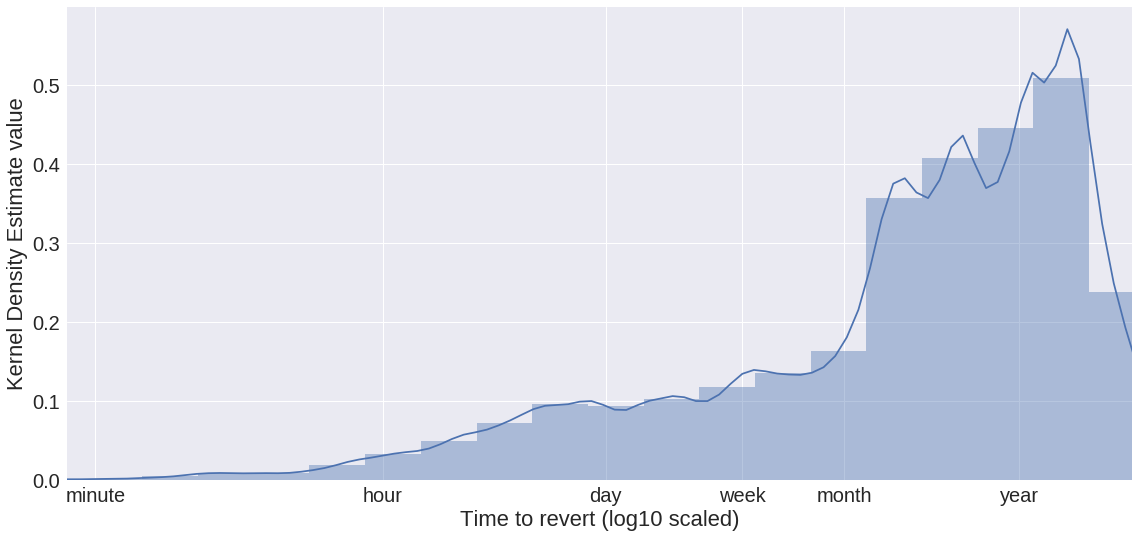

In [26]:
sns.set(font_scale=2)

g = sns.FacetGrid(df_en_ns0, size=8, aspect=2)
g.map(sns.distplot, "time_to_revert_hrs_log10", bins=25)

g.ax.set_xticks([np.log10(1/60),np.log10(1), np.log10(24), np.log10(24*7), np.log10(24*30), np.log10(24*365)])
g.ax.set_xticklabels(["minute", "hour", "day", "week", "month", "year"])

g.ax.set_xlim(np.log10(1/90), np.log10(24*365*5))

g.ax.set_ylabel("Kernel Density Estimate value")
g.ax.set_xlabel("Time to revert (log10 scaled)")

### KDE for ns0, all languages

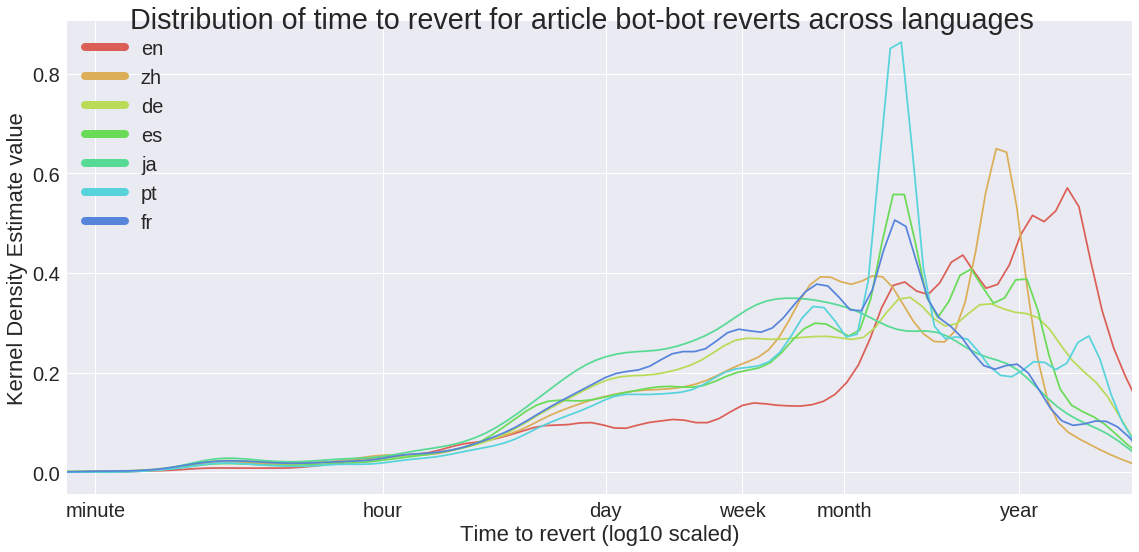

In [27]:
sns.set(font_scale=2)
pal = sns.color_palette("hls", 10)
g = sns.FacetGrid(df_all.query("page_namespace == 0"), palette=pal, hue="language", size=8, aspect=2)
g.map(sns.kdeplot, "time_to_revert_hrs_log10")
#g.add_legend()
leg = plt.legend()
for legobj in leg.legendHandles:
    legobj.set_linewidth(8.0)

g.ax.set_xlim(np.log10(1/90), np.log10(24*365*5))

g.ax.set_ylabel("Kernel Density Estimate value")
g.ax.set_xlabel("Time to revert (log10 scaled)")
plt.suptitle("Distribution of time to revert for article bot-bot reverts across languages")

g.ax.set_xticks([np.log10(1/60),np.log10(1), np.log10(24), np.log10(24*7), np.log10(24*30), np.log10(24*365)])
g.ax.set_xticklabels(["minute", "hour", "day", "week", "month", "year"])

### Mean & median time to revert by languages

In [31]:
ns0_gb_language = df_all.query("page_namespace == 0").groupby("language")
ns0_gb_language['time_to_revert_days'].describe().unstack()

,count,mean,std,min,25%,50%,75%,max
language,,,,,,,,
de,109818.0,177.229747,323.371493,-792.165938,3.369039,29.796123,210.347813,2812.659664
en,488796.0,354.051758,502.663314,0.000012,16.877627,138.318825,505.988738,4823.938021
es,135960.0,150.104211,275.396170,0.000023,4.481791,47.547847,172.917746,2727.134711
fr,112510.0,121.746614,282.001929,0.000023,2.935177,21.367500,82.702668,2862.087998
ja,69208.0,107.450039,252.998978,0.000231,1.897529,13.455127,80.502080,2850.540775
pt,120070.0,177.773675,338.063786,0.000023,6.675631,56.883611,135.026589,2798.985463
zh,86030.0,120.061275,196.408751,0.000116,4.885136,32.900625,213.030067,2869.869861


In [48]:
ns0_gb_language_year = df_all.query("page_namespace == 0").groupby(["language", "reverting_year"])
ns0_gb_language_year['time_to_revert_days'].median().unstack()

reverting_year,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
language,,,,,,,,,,,,,
de,2.439618,6.287488,12.742436,8.252627,11.230156,14.609624,6.211343,7.707627,5.969780,279.502292,189.267894,575.239363,791.212373
en,63.480868,10.203275,12.095544,13.318663,26.052465,79.020104,40.778594,37.459572,14.168519,300.279653,266.494740,201.227841,303.339485
es,NaN,5.375266,9.429537,11.184734,14.064867,6.993437,2.047315,61.636123,7.451910,175.878571,234.881152,325.514109,473.861042
fr,9.640359,5.506470,13.408519,7.898646,12.524988,10.906146,8.909699,20.092894,6.198200,150.262350,609.872124,43.618009,167.325000
ja,3.662130,9.422280,17.108843,8.956308,10.870405,8.286950,7.932205,5.906661,6.568229,232.283553,155.465810,28.741464,15.254803
pt,9.191991,5.794606,23.212772,38.849572,16.081863,46.262870,8.320255,60.851499,7.508027,78.069688,273.977500,498.165880,841.094109
zh,14.220000,27.748524,10.916933,7.685845,12.490764,9.794954,8.918437,4.885150,6.302905,174.916956,273.386863,30.850069,299.686412


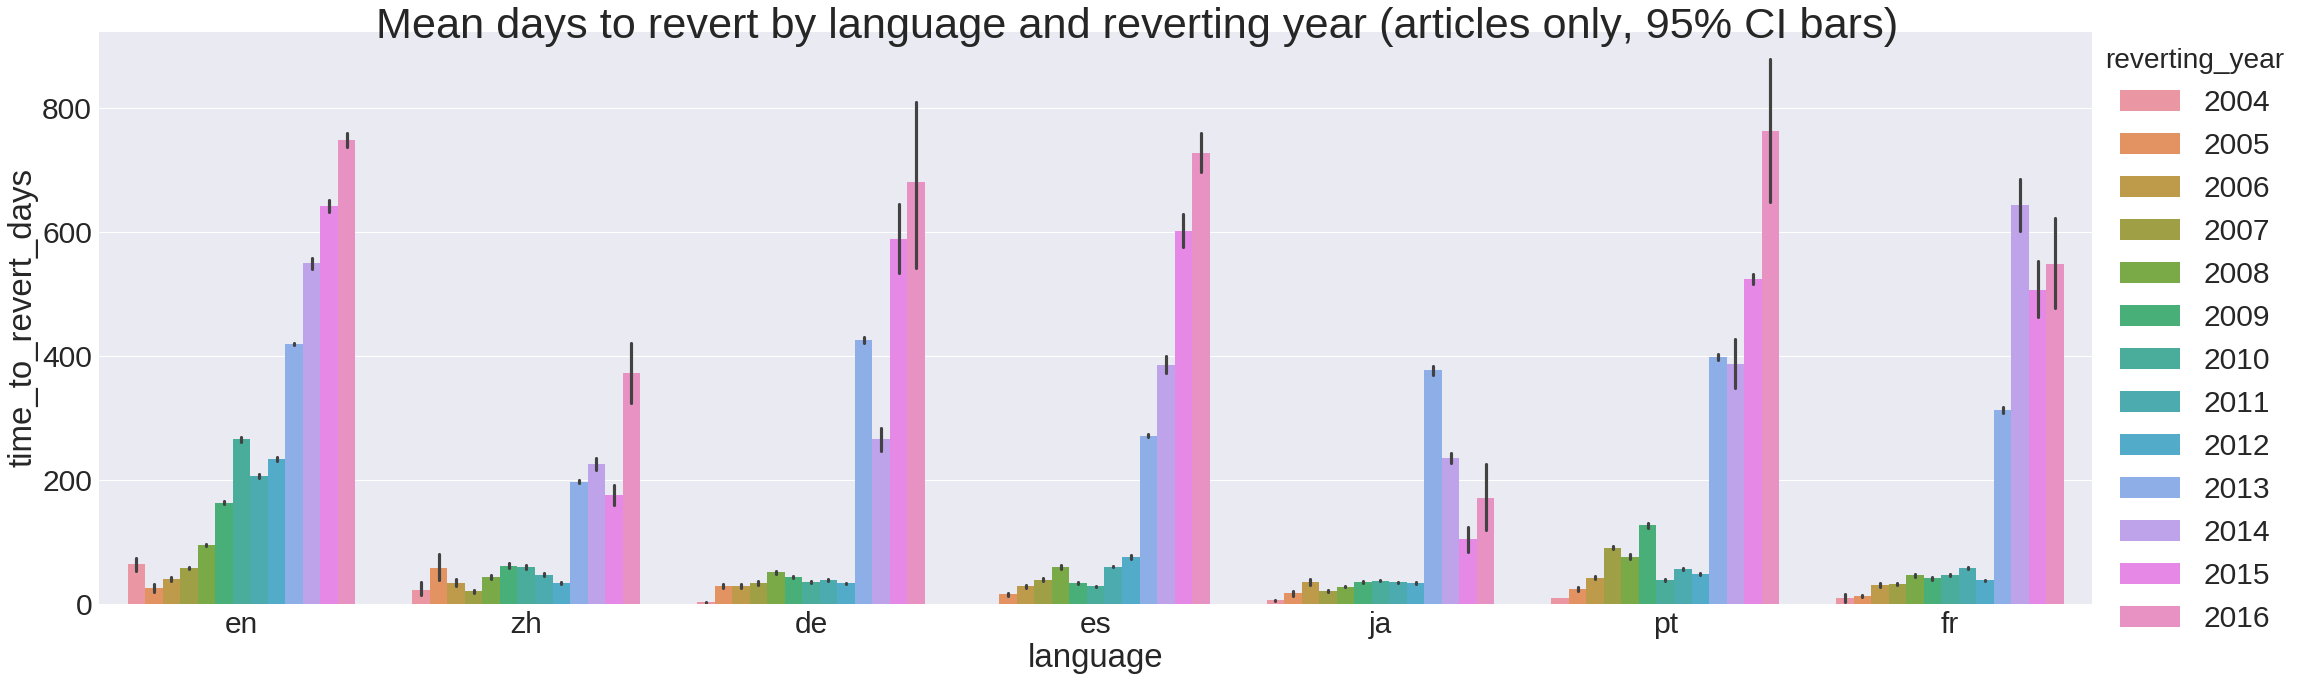

In [51]:
sns.set(font_scale=3)

g = sns.factorplot(data=df_all[df_all['page_namespace']==0],
                   x='language',
                   y='time_to_revert_days',
                   hue='reverting_year',
                   kind='bar',
                   size=10,
                   aspect = 3)

plt.suptitle("Mean days to revert by language and reverting year (articles only, 95% CI bars)")

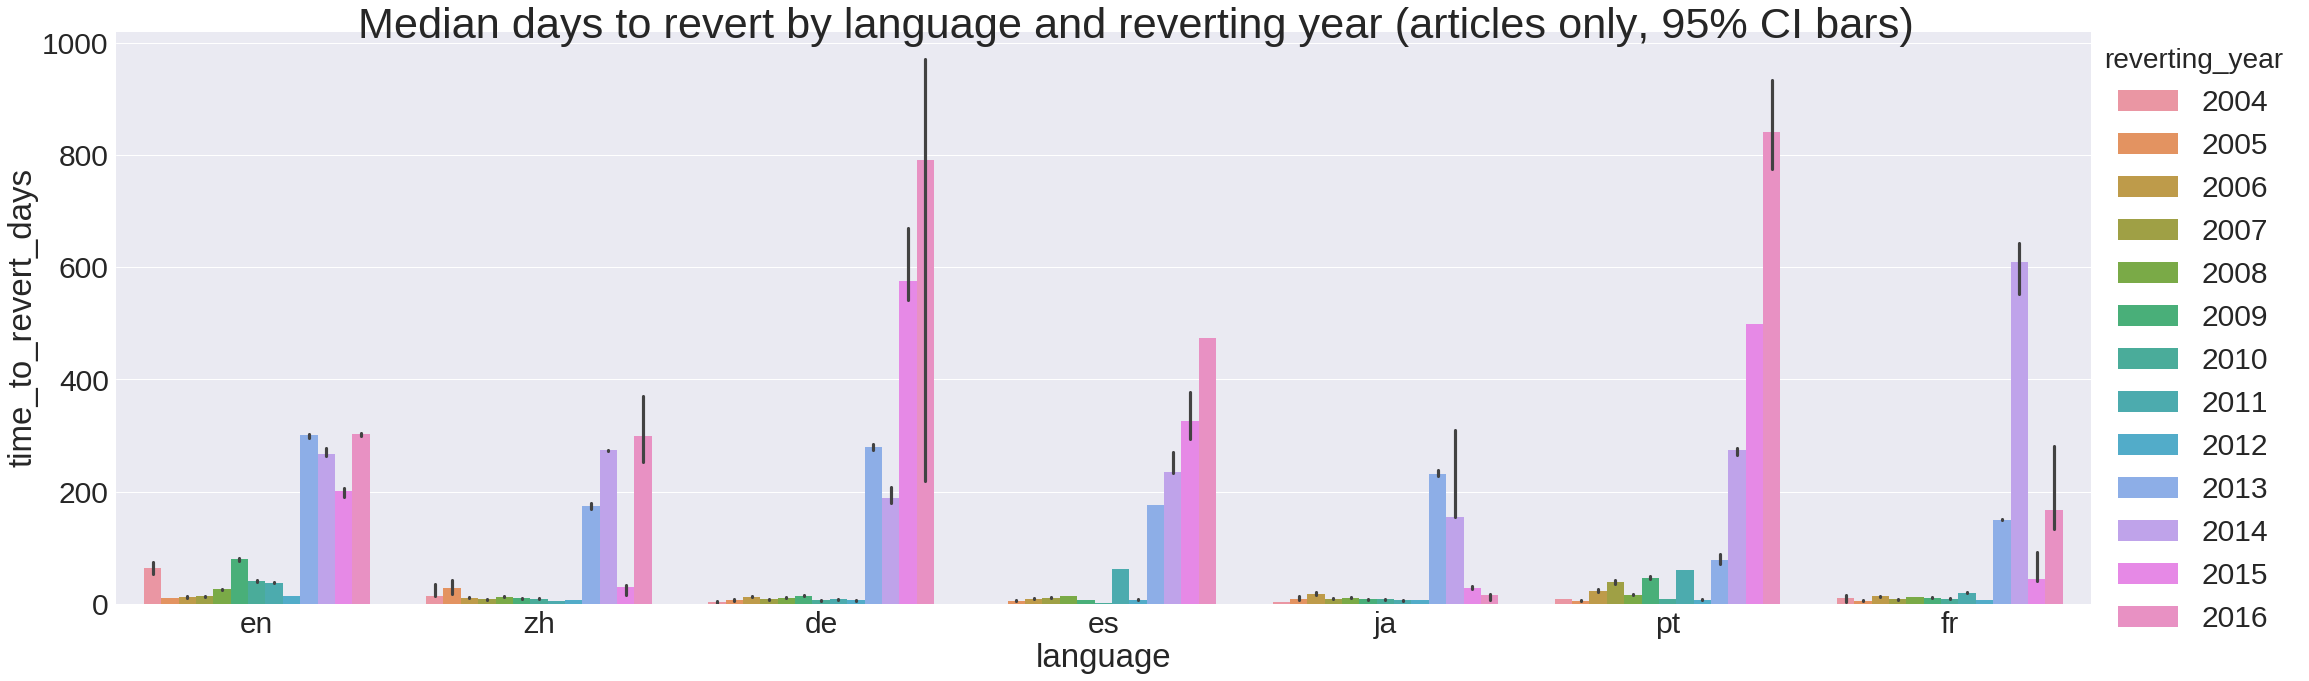

In [52]:
sns.set(font_scale=3)

g = sns.factorplot(data=df_all[df_all['page_namespace']==0],
                   x='language',
                   y='time_to_revert_days',
                   hue='reverting_year',
                   kind='bar',
                   estimator=np.median,                   
                   size=10,
                   aspect = 3)

plt.suptitle("Median days to revert by language and reverting year (articles only, 95% CI bars)")

## Consolidate bottypes

In [11]:
def bottype_group(bottype):
    if bottype == "interwiki link cleanup -- suspected":
        return "interwiki link cleanup"
    
    elif bottype == "interwiki link cleanup":
        return "interwiki link cleanup"
    
    elif bottype.find("botfight") >= 0:
        return 'botfight'
    
    elif bottype == 'other':
        return 'not classified'
    
    elif bottype == 'fixing double redirect':
        return 'fixing double redirect'
    
    elif bottype == 'protection template cleanup':
        return 'protection template cleanup'
    
    elif bottype.find("category") >= 0:
        return 'category work'
    
    elif bottype.find("template") >= 0:
        return 'template work'
    
    elif bottype == "other w/ revert in comment":
        return "other w/ revert in comment"
    
    else:
        return "other classified"

In [12]:
df_en_ns0['bottype_consolidated'] = df_en_ns0['bottype'].apply(bottype_group)

# Plots

## enwiki ns0, bottype consolidated, 0-60 days, log time to revert

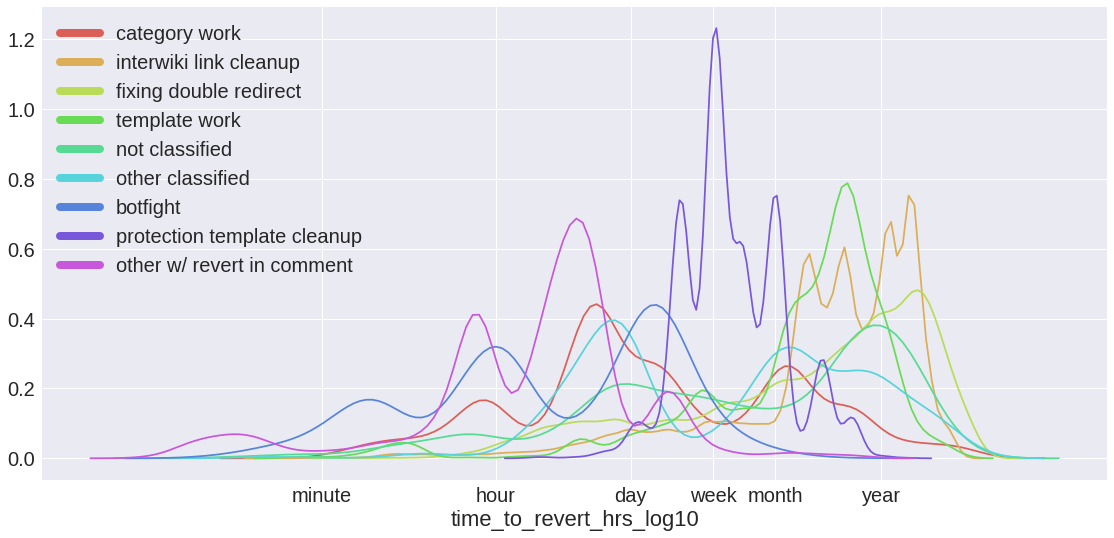

In [13]:
sns.set(font_scale=2)
pal = sns.color_palette("hls", 10)
g = sns.FacetGrid(df_en_ns0, palette=pal, hue="bottype_consolidated", size=8, aspect=2)
g.map(sns.kdeplot, "time_to_revert_hrs_log10")
#g.add_legend()
leg = plt.legend()
for legobj in leg.legendHandles:
    legobj.set_linewidth(8.0)
    
    
g.ax.set_xticks([np.log10(1/60),np.log10(1), np.log10(24), np.log10(24*7), np.log10(24*30), np.log10(24*365)])
g.ax.set_xticklabels(["minute", "hour", "day", "week", "month", "year"])

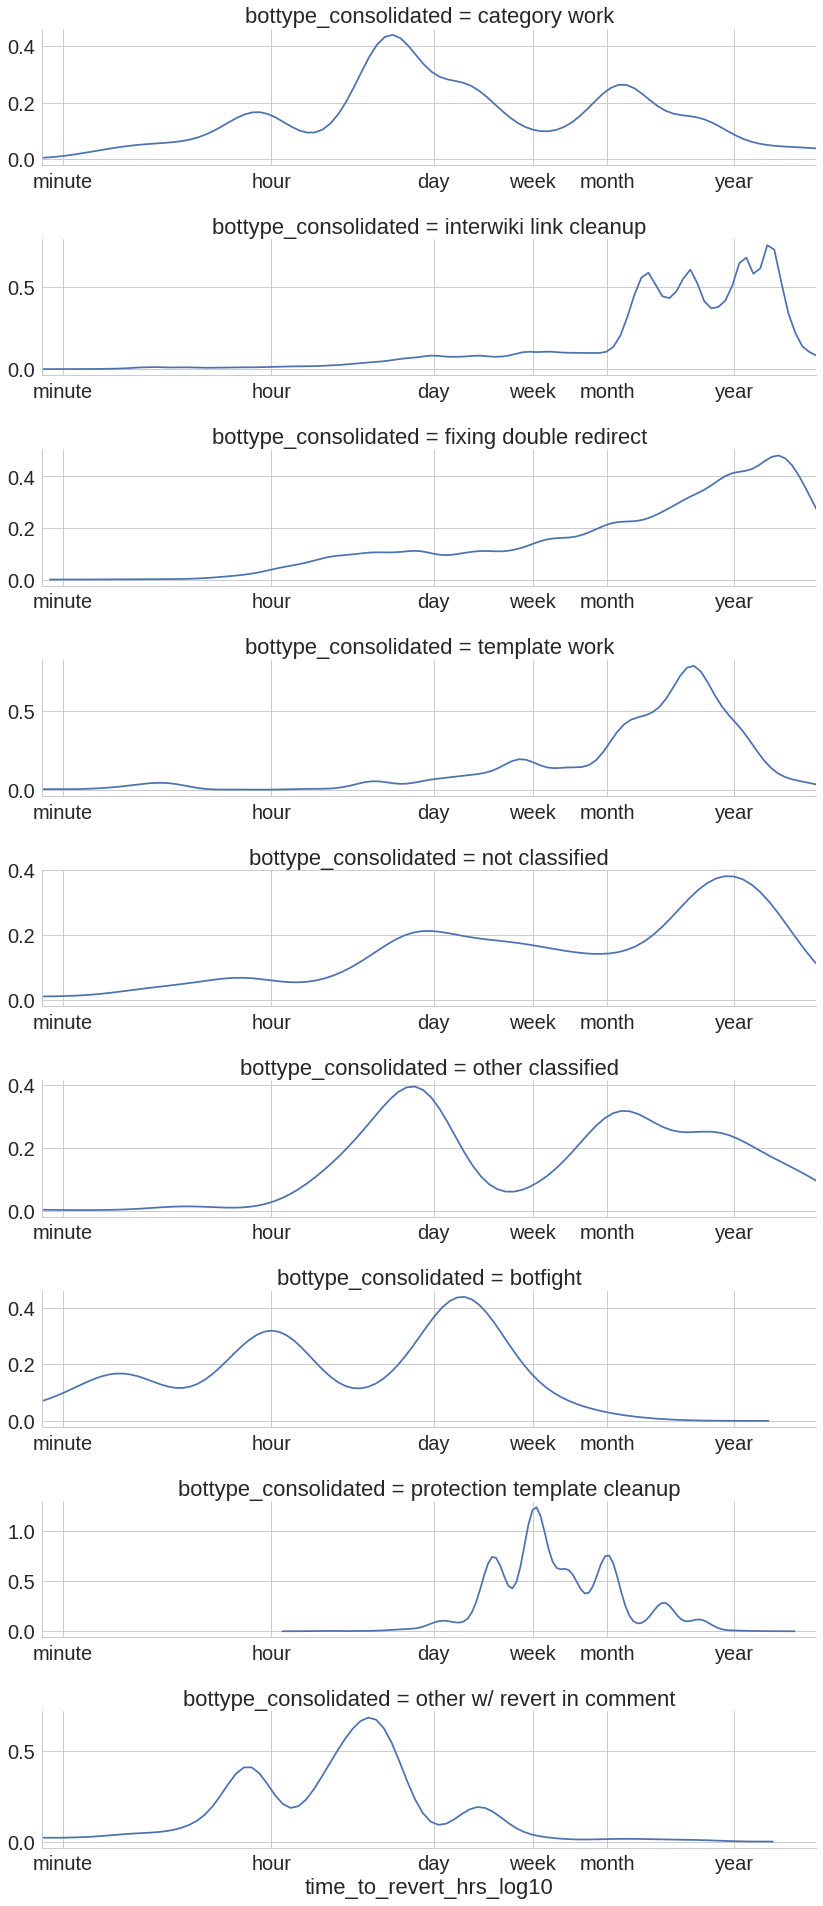

In [14]:
sns.set(style="whitegrid", font_scale=2)
pal = sns.color_palette("husl", 7)
g = sns.FacetGrid(df_en_ns0, palette=pal,
                  row="bottype_consolidated",
                  size=3, aspect=4,
                  sharex=False, sharey=False)

g.map(sns.kdeplot, "time_to_revert_hrs_log10")

xticks = [np.log10(1/60),np.log10(1), np.log10(24), np.log10(24*7), np.log10(24*30), np.log10(24*365)]
xticklabels = ["minute", "hour", "day", "week", "month", "year"]

for ax in g.axes.flatten():
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)
    ax.set_xlim(np.log10(1/90), np.log10(24*365*5))

### Individual cases paneled

/home/staeiou/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/home/staeiou/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


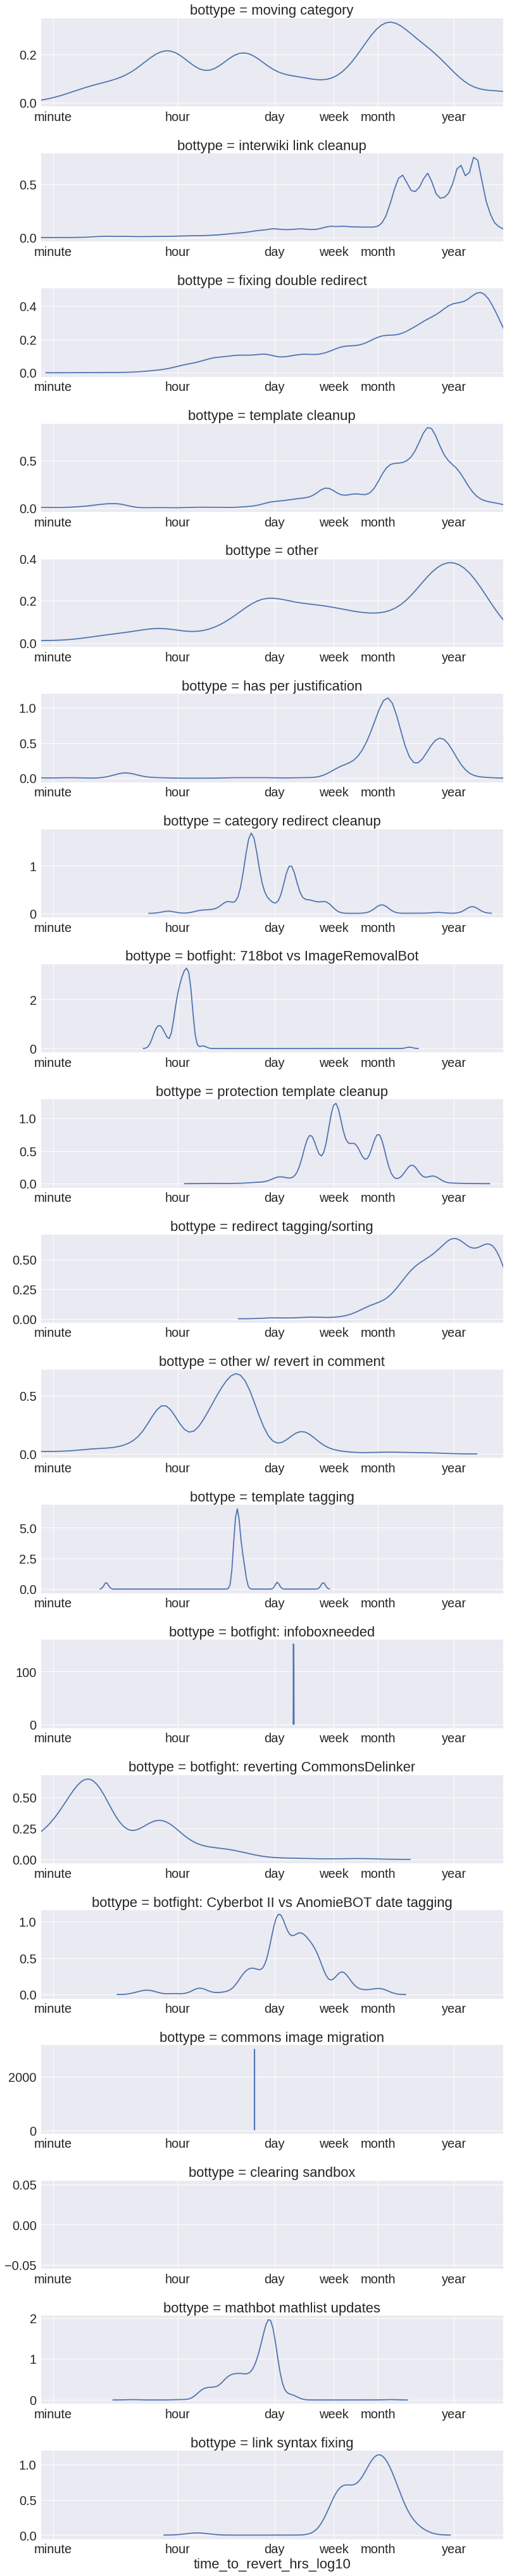

In [15]:
sns.set(font_scale=2)
pal = sns.color_palette("husl", 7)
g = sns.FacetGrid(df_en_ns0, palette=pal, row="bottype", size=3, aspect=4, sharex=False, sharey=False)
g.map(sns.kdeplot, "time_to_revert_hrs_log10")

xticks = [np.log10(1/60),np.log10(1), np.log10(24), np.log10(24*7), np.log10(24*30), np.log10(24*365)]
xticklabels = ["minute", "hour", "day", "week", "month", "year"]

for ax in g.axes.flatten():
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)
    ax.set_xlim(np.log10(1/90), np.log10(24*365*5))

In [54]:
sns.set(font_scale=2)
pal = sns.color_palette("hls", 10)
g = sns.FacetGrid(df_all.query("page_namespace == 0"), palette=pal, hue="bottype_group", size=8, aspect=2)
g.map(sns.kdeplot, "time_to_revert_hrs_log10")
#g.add_legend()
leg = plt.legend()
for legobj in leg.legendHandles:
    legobj.set_linewidth(8.0)
    
    
g.ax.set_xticks([np.log10(1/60),np.log10(1), np.log10(24), np.log10(24*7), np.log10(24*30), np.log10(24*365)])
g.ax.set_xticklabels(["minute", "hour", "day", "week", "month", "year"])

KeyError: 'bottype_group'